# Milestone 2
Supervised learning.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
import sklearn.preprocessing
import sklearn.metrics
import seaborn as sns; sns.set()

from sklearn import neighbors, linear_model, svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

## Load data

In [2]:
df = pd.read_csv('dengue_features_train.csv')
y_ = pd.read_csv('dengue_labels_train.csv')

In [3]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [4]:
df.drop(['week_start_date'], axis=1, inplace=True)
df.set_index(['city', 'year', 'weekofyear'], inplace=True)
y_.set_index(['city', 'year', 'weekofyear'], inplace=True)
df.shape, y_.shape

((1456, 20), (1456, 1))

In [5]:
df.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   1990 18          0.122600  0.103725  0.198483  0.177617   
          19          0.169900  0.142175  0.162357  0.155486   
          20          0.032250  0.172967  0.157200  0.170843   
          21          0.128633  0.245067  0.227557  0.235886   
          22          0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571

In [6]:
df.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


# Preprocessing

## Fill NaN

In [7]:
df.isna().sum()
# ffill: propagate last valid observation forward to next valid backfill
# @ Check other methods
df.fillna(method="bfill", inplace=True)
df.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Normalize data

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()
X_ = scaler.fit_transform(df)

## PCA
Normalize the data and apply find best principal components.

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_)
X_pca.shape

(1456, 20)

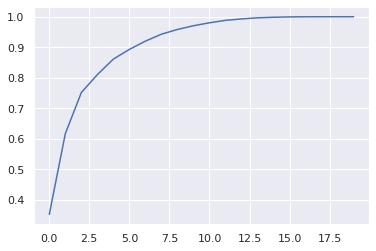

In [10]:
var_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(len(var_ratio)), np.cumsum(var_ratio))

In [11]:
X_pca = pd.DataFrame(X_pca, index=df.index)

## Prepare work sets

In [12]:
GROUP_SUBSET = False

In [13]:
X_ = pd.DataFrame(X_, index=df.index, columns=df.columns)

In [14]:
if GROUP_SUBSET:
    sj = X_.loc['sj'][X_.loc['sj'].index.get_level_values(0) >= 1992]
    sj = sj[sj.index.get_level_values(0) <= 1998]
    X_.drop('sj', level=0, inplace=True)
    X_ = pd.concat((pd.concat({'sj':sj}), X_))

    sj = y_.loc['sj'][y_.loc['sj'].index.get_level_values(0) >= 1992]
    sj = sj[sj.index.get_level_values(0) <= 1998]
    y_.drop('sj', level=0, inplace=True)
    y_ = pd.concat((pd.concat({'sj':sj}), y_))

## Preprocess function
Define a function which allows repetition of the preprocessing steps taken.

In [112]:
def preprocess(df, pca=False):
    df.drop(['week_start_date'], axis=1, inplace=True)
    df.set_index(['city', 'year', 'weekofyear'], inplace=True)
    
    df.fillna(method="bfill", inplace=True)
    scaler = sklearn.preprocessing.StandardScaler()
    x = scaler.fit_transform(df)
    x = pd.DataFrame(x, index=df.index, columns=df.columns)
    
    if pca:
        pca = PCA()
        x = pca.fit_transform(x)
        return pd.DataFrame(x, index=df.index)
    
    return x

# 0. Analyze data

In [16]:
X_analyze = X_.join(y_)
X_pca_analyze = X_pca.join(y_)

### Mean and variance

In [17]:
y_.mean(level=0)

,total_cases
city,
sj,34.180556
iq,7.565385


In [18]:
y_.var(level=0)

,total_cases
city,
sj,2640.045440
iq,115.895524


### Distribution

Text(0.5, 1.0, 'iq')

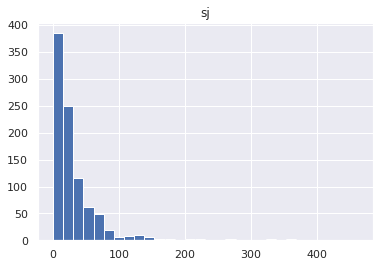

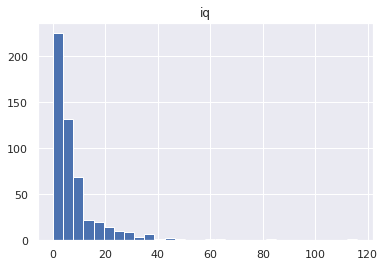

In [19]:
y_.loc['sj'].hist(bins=30)
plt.title('sj')
y_.loc['iq'].hist(bins=30)
plt.title('iq')

## 0.1. Target space transformation
The goal is to achieve normal distribution on the target state space.

In [20]:
class LogShift:
    ENABLED = True
    
    @staticmethod
    def normal(arr):
        return np.log(arr + 1)
    
    @staticmethod
    def original(arr):
        return np.rint(np.exp(arr - 1)) if LogShift.ENABLED else arr

In [21]:
y_['normal'] = LogShift.normal(y_.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23399c0eb0>,
      dtype=object)

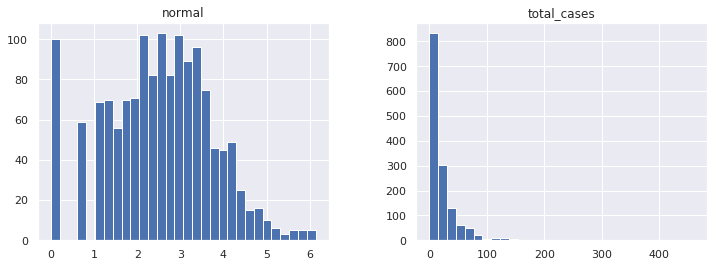

In [22]:
y_.hist(bins=30, figsize=(12,4))

## 0.2. Features importance

In [23]:
corr_X = X_analyze.corr()

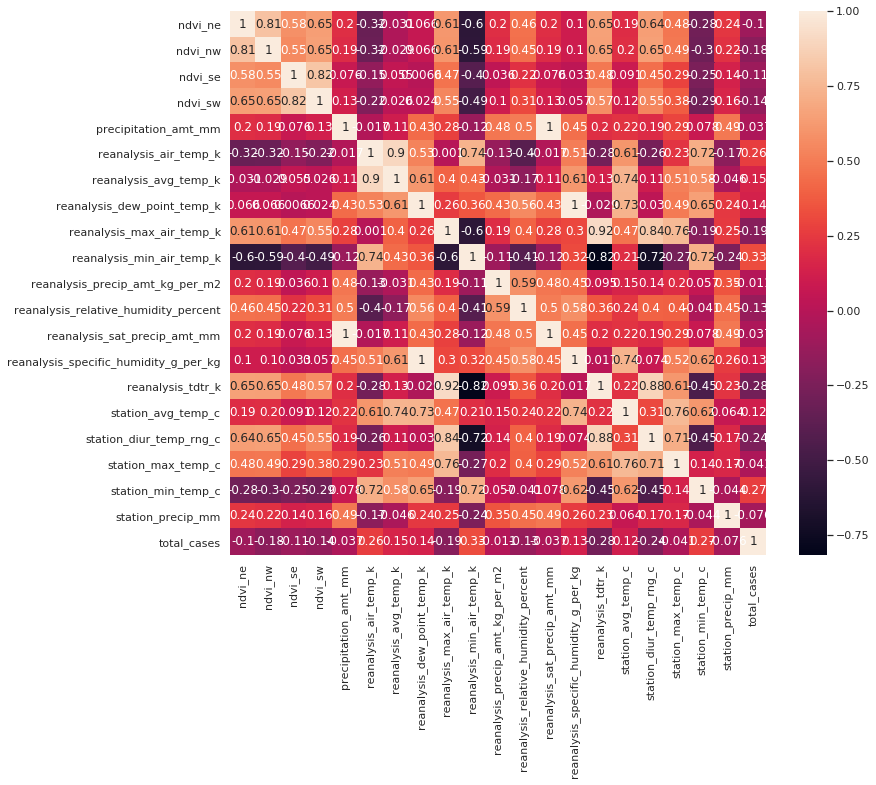

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_X, annot=True)

### 0.2.1. Find correlated features

In [25]:
threshold = 0.8

In [26]:
duplicates = corr_X.abs().values > threshold
duplicate_count = pd.DataFrame(duplicates.sum(axis=0) - 1, index=corr_X.index, columns=['duplicates'])

duplicates = np.argwhere(duplicates)
duplicates = duplicates[(lambda x: x[0] != x[1])(duplicates.T)]
duplicates.sort()

duplicates = np.vectorize(lambda x: corr_X.columns[x])(duplicates)

In [27]:
duplicates = set([tuple(elem) for elem in duplicates])
duplicates

{('ndvi_ne', 'ndvi_nw'),
 ('ndvi_se', 'ndvi_sw'),
 ('precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'),
 ('reanalysis_air_temp_k', 'reanalysis_avg_temp_k'),
 ('reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg'),
 ('reanalysis_max_air_temp_k', 'reanalysis_tdtr_k'),
 ('reanalysis_max_air_temp_k', 'station_diur_temp_rng_c'),
 ('reanalysis_min_air_temp_k', 'reanalysis_tdtr_k'),
 ('reanalysis_tdtr_k', 'station_diur_temp_rng_c')}

### 0.2.2. Feature importances

0.1486834166525061

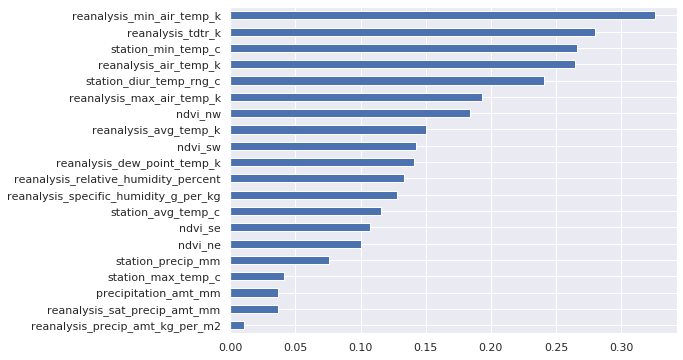

In [28]:
plt.figure(figsize=(8,6))
feature_importance_X = corr_X['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_X.plot.barh()
feature_importance_X.mean()

### 0.2.3. Clean duplicates with less importance

In [29]:
needs_cleaning = []
for a,b in duplicates:
    bias = feature_importance_X[a] - feature_importance_X[b]
    needs_cleaning.append(b if bias > 0 else a)

In [30]:
needs_cleaning

['precipitation_amt_mm',
 'ndvi_ne',
 'reanalysis_max_air_temp_k',
 'reanalysis_max_air_temp_k',
 'station_diur_temp_rng_c',
 'ndvi_se',
 'reanalysis_tdtr_k',
 'reanalysis_avg_temp_k',
 'reanalysis_specific_humidity_g_per_kg']

In [31]:
X_.drop(needs_cleaning, axis=1, inplace=True)
X_analyze.drop(needs_cleaning, axis=1, inplace=True)

0.14481925527032521

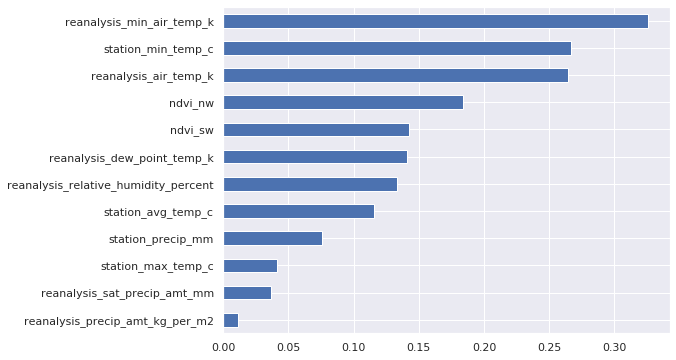

In [32]:
plt.figure(figsize=(8,6))
feature_importance_X = X_analyze.corr()['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_X.plot.barh()
feature_importance_X.mean()

## 0.3. PCA components importance

In [33]:
corr_pca = X_pca_analyze.corr()

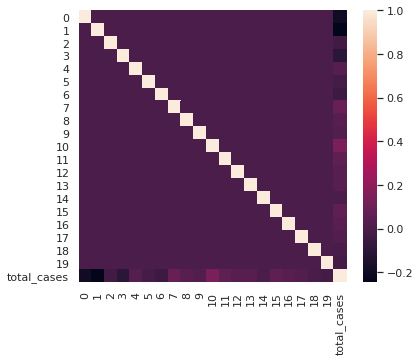

In [34]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_pca, annot=False)

0.06194929622698806

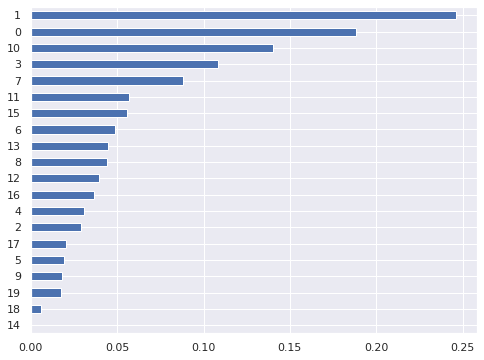

In [35]:
plt.figure(figsize=(8,6))
feature_importance_pca = corr_pca['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_pca.plot.barh()
feature_importance_pca.mean()

# 1. Baseline

### Helper functions

In [36]:
def split_to_train(X, y, test_size=0.1):
      return train_test_split(pd.concat([X, y], axis=1), test_size=test_size)
    
def get_predictions(regressor, X):
    return np.rint(regressor.predict(X))

def get_mae(regressor, X, y):
    y_pred = get_predictions(regressor, X)
    return mean_absolute_error(y_pred, y)

def fit_regressor(regressor, X, y):
    train, test = split_to_train(X, y)
    regressor.fit(X=train.drop(['total_cases'], axis=1), y=train['total_cases'])
    
    return get_mae(regressor, test.drop(['total_cases'], axis=1), test['total_cases'])

def generate_visualization(y_pred, y):
    mae = mean_absolute_error(y, y_pred)

    plt.plot(np.arange(len(y_pred)), y, c='r', label='data')
    plt.plot(np.arange(len(y_pred)), y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()

    plt.show()
    return mae

def get_fold_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = []
    cv = KFold(n_splits, shuffle=False)
    for train_fold, test_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        X_test = X.iloc[test_fold]
        y_train = y.iloc[train_fold]
        y_test = y.iloc[test_fold]

        regressor.fit(X=X_train, y=y_train.values.ravel())
        fold_accuracy.append(get_mae(regressor, X_test, y_test))
    return fold_accuracy

def get_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = get_fold_accuracy(regressor, X, y, n_splits)
    return max(fold_accuracy) #sum(fold_accuracy) / len(fold_accuracy)

def generate_plot(X, y, regressor, param_name, pm_range, n_split=10):
    mae = []
    for i in pm_range:
        regressor.set_params(**{param_name:i})
        mae.append(get_accuracy(regressor, X, y, n_split))

    label = type(regressor).__name__

    if type(regressor).__name__ == 'KNeighborsRegressor':
        label = regressor.get_params()['weights']
    elif type(regressor).__name__ == 'RandomForestRegressor':
        params = regressor.get_params()
        n_estimators = params['n_estimators']
        max_depth = params[param_name]
        label = f'n_estimators={n_estimators}'

    plt.plot(pm_range, mae, marker='o', label=label)
    print ('Min Value: {} ({})'.format(min(mae), list(pm_range)[np.argmin(mae)]))
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend()

def save_results(y_pred, name, index):
    res = np.rint(y_pred) # round
    res = res.astype(int) # cast to int
    aux = pd.DataFrame(np.vstack((*np.array(index.values.tolist()).T, res)).T, columns=list(index.names)+['total_cases'])
    aux.to_csv(name, index=False)
    return name

## 1.0. Select data to work on

### 1.0.1. Drop least important features

In [38]:
importances = feature_importance_pca
drop_features = 9

drop_features = list(importances[:drop_features].index)
drop_features

[14, 18, 19, 9, 5, 17, 2, 4, 16]

### 1.0.2. Set target dataset
Here we assign a work dataset.
It can be the whole dataset / Iquitos part / San Juan part / PCA or any other stored dataframe.

In [122]:
X = X_pca.loc['iq'].drop(drop_features, axis=1)
y = y_.loc['iq']['normal']

In [123]:
# Set to False if using original total_cases column
LogShift.ENABLED = True
if LogShift.ENABLED:
    y.name = 'total_cases'

### 1.0.3. Train test split

In [124]:
ds_train, ds_test = split_to_train(X, y, 0.1)

In [125]:
X_train = ds_train.drop('total_cases', axis=1)
X_test = ds_test.drop('total_cases', axis=1)
y_train = ds_train['total_cases']
y_test = ds_test['total_cases']

In [126]:
X_train.shape

(468, 11)

## 1.1. KNN

### 1.1.1. Mean absolute error

Weights: uniform =>
Min Value: 1.2202850491446238 (10)
Weights: distance =>
Min Value: 1.2587465876061623 (12)


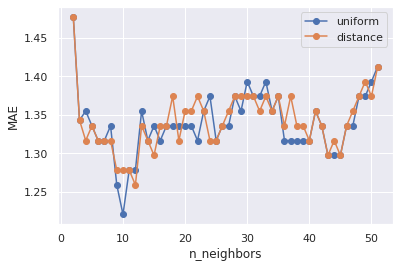

In [127]:
max_n_neighbors = int(0.1 * len(X))
for weights in ['uniform', 'distance']:
    knn = neighbors.KNeighborsRegressor(weights=weights)
    print(f"Weights: {weights} =>")
    generate_plot(X, y, knn, 'n_neighbors', range(2,max_n_neighbors), 10)
plt.show()  

### 1.1.2. Predictions

In [128]:
n_neighbors = 10
weights = 'uniform'
knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights) 

print('MAE: ', fit_regressor(knn, X_train, y_train))

MAE:  0.6184930929585067


In [129]:
y_pred = LogShift.original(get_predictions(knn, X_test))

### 1.1.3. Visualisation

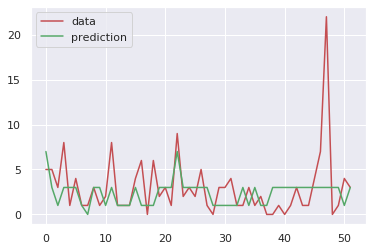

2.076923076923077

In [130]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.2. Decision Tree

### 1.2.1. Mean absolute error

Min Value: 1.1271866469015406 (3)


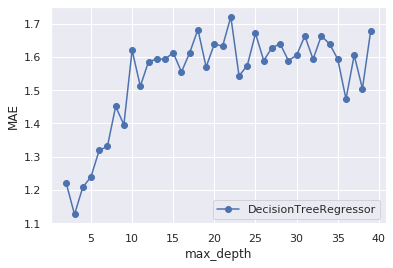

In [131]:
dt = DecisionTreeRegressor()
generate_plot(X, y, dt, 'max_depth', range(2,40), 10)
plt.show()

### 1.2.2. Predictions

In [132]:
dt = DecisionTreeRegressor(max_depth=3)
fit_regressor(dt, X_train, y_train)

0.8556159011791689

In [133]:
y_pred = LogShift.original(get_predictions(dt, X_test))

### 1.2.3. Visualisation

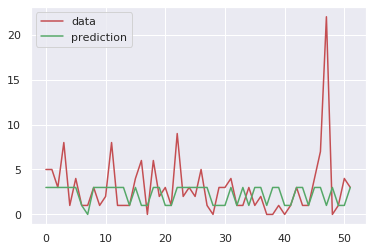

2.0

In [134]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.3. Random forest

### 1.3.1. Mean absolute error

Estimators: 2 =>
Min Value: 1.2779773568369315 (11)
Estimators: 3 =>
Min Value: 1.2779773568369315 (11)
Estimators: 4 =>
Min Value: 1.2010542799138546 (2)
Estimators: 5 =>
Min Value: 1.2972081260677006 (4)
Estimators: 6 =>
Min Value: 1.31643889529847 (6)
Estimators: 7 =>
Min Value: 1.2587465876061623 (14)


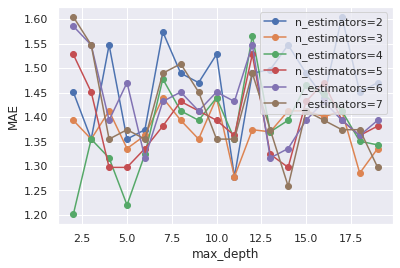

In [135]:
max_estimators = 8
max_max_depth = 20
for n in range(2, max_estimators):
    rf = RandomForestRegressor(n_estimators=n, criterion='mae', random_state=0)
    print(f"Estimators: {n} =>")
    generate_plot(X, y, rf, 'max_depth', range(2,max_max_depth), 10)
plt.show()

### 1.3.2. Predictions

In [138]:
rf = RandomForestRegressor(n_estimators=4, max_depth=2, criterion='mae', random_state=0)
fit_regressor(rf, X_train, y_train)

0.7283743430589507

In [139]:
y_pred = LogShift.original(get_predictions(rf, X_test))

### 1.3.3. Visualisation

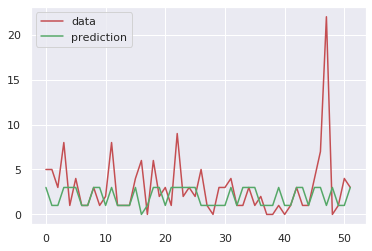

1.9615384615384615

In [140]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.4. Linear SVR

### 1.4.1. Mean absolute error

Min Value: 1.2883858454155361 (0.0002878615592354568)


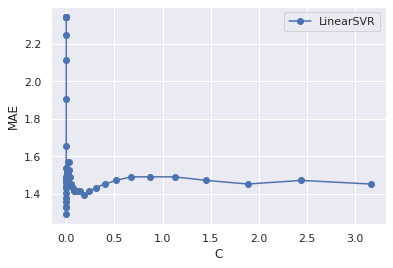

In [142]:
svr = svm.LinearSVR(C=1.0, epsilon=0.0, tol=1e-4, loss='squared_epsilon_insensitive', max_iter=1e4, random_state=99)
generate_plot(X, y, svr, 'C', np.logspace(-5,0.5,num=50), 10)
plt.show()

### 1.4.2. Predictions

In [143]:
svr = svm.LinearSVR(C=0.0002, epsilon=0.0, loss='squared_epsilon_insensitive', max_iter=1e4, random_state=99)
fit_regressor(svr, X_train, y_train)

1.1855981710670982

In [144]:
y_pred = LogShift.original(get_predictions(svr, X_test))

### 1.4.3. Visualisation

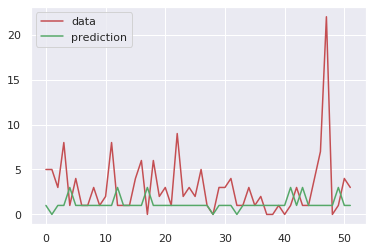

2.4615384615384617

In [145]:
generate_visualization(y_pred, LogShift.original(y_test))

# 2. Automatic optimization

## Helper functions

In [146]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}\n".format(results['params'][candidate]))

## 2.1. Boosting

In [147]:
regressor_names = ['KNN', 'Decision tree', 'Random Forest', 'Ada Boost', 'GradientBoosting']
regressors = [KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights),
              DecisionTreeRegressor(max_depth=3),
              RandomForestRegressor(n_estimators=4, max_depth=3, criterion='mae',random_state=0),
              AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.5),
              GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0, loss='ls')]
regressors = {regressor_names[i]: regressors[i] for i in range(0,len(regressor_names))}

In [148]:
for i, reg in regressors.items():
    print(f'{i}:\n\tMAE:{get_accuracy(reg, X_train, y_train, 12)}')

KNN:
	MAE:1.0461448769110915
Decision tree:
	MAE:1.0271186881296477
Random Forest:
	MAE:1.0611166614699525
Ada Boost:
	MAE:1.041306694233035
GradientBoosting:
	MAE:1.1380397383930294


In [149]:
regressors_df = pd.DataFrame({i:r.feature_importances_ for i,r in list(regressors.items())[1:]}, index=X_train.columns)

In [150]:
regressors_df.sum()

Decision tree       1.0
Random Forest       1.0
Ada Boost           1.0
GradientBoosting    1.0
dtype: float64

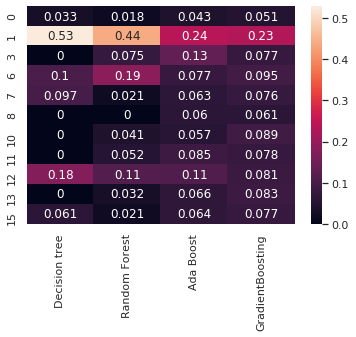

In [151]:
sns.heatmap(regressors_df, annot=True)

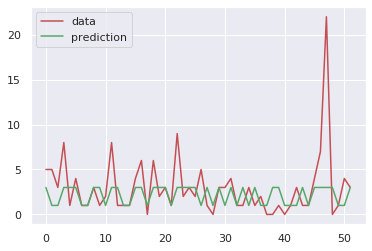

1.9423076923076923

In [152]:
generate_visualization(LogShift.original(get_predictions(regressors['Ada Boost'], X_test)), LogShift.original(y_test))

## 2.2. Grid Search

### 2.2.1. Setting

In [153]:
param_dist = {"n_estimators": [2, 4, 8, 16, 32, 64], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": np.arange(2,16,2), # Maximum number of levels in tree
              "min_samples_split": np.arange(2,10,2), #  Minimum number of samples required to split a node
              "min_samples_leaf": np.arange(8,16,2), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [154]:
est_rf = RandomForestRegressor()
grid_regres = GridSearchCV(estimator=est_rf, param_grid=param_dist, cv=5)

grid_regres.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 8, 10, 12, 14]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': [2, 4, 8, 16, 32, 64]})

### 2.2.2. Results

In [155]:
report(grid_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.159 (std: 0.059)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 8}

Model with rank: 2
Mean validation score: 0.155 (std: 0.043)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 8}

Model with rank: 3
Mean validation score: 0.154 (std: 0.046)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 16}

Model with rank: 4
Mean validation score: 0.153 (std: 0.040)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 16}

Model with rank: 5
Mean validation score: 0.149 (std: 0.054)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 3

In [156]:
grid_regres.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 8}

In [157]:
get_mae(grid_regres.best_estimator_, X_test, y_test)

0.7335020585954886

### 2.2.3. Visualisation

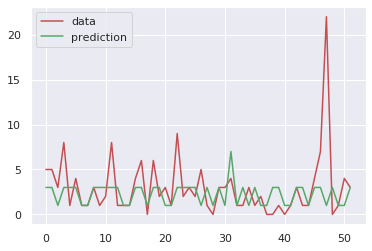

1.9807692307692308

In [158]:
generate_visualization(LogShift.original(get_predictions(grid_regres.best_estimator_, X_test)), LogShift.original(y_test))

## 2.3. Randomized Search

### 2.3.1. Setting

In [159]:
param_dist = {"n_estimators": sp_randint(2,256), # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12, 8, 4, 2, None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [160]:
rnd_regres = RandomizedSearchCV(estimator=est_rf, param_distributions=param_dist, 
                               n_iter=1000, cv=5, random_state=0, n_jobs=-1)
rnd_regres.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f231b256b50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f231b288310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f231b288fa0>},
                   random_state=0)

### 2.3.2. Results

In [161]:
report(rnd_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.145 (std: 0.045)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 31, 'n_estimators': 135}

Model with rank: 2
Mean validation score: 0.143 (std: 0.050)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 228}

Model with rank: 3
Mean validation score: 0.143 (std: 0.052)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 193}

Model with rank: 4
Mean validation score: 0.143 (std: 0.039)
Parameters: {'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 105}

Model with rank: 5
Mean validation score: 0.142 (std: 0.048)
Parameters: {'bootstrap': True, 'criterion': 

In [162]:
rnd_regres.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 31,
 'n_estimators': 135}

In [163]:
get_mae(rnd_regres.best_estimator_, X_test, y_test)

0.70655140413896

### 2.3.3. Visualisation

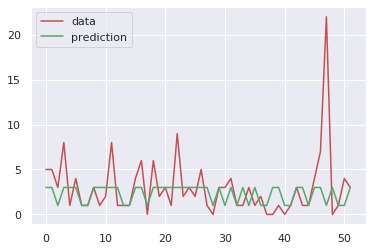

1.9038461538461537

In [164]:
generate_visualization(LogShift.original(get_predictions(rnd_regres.best_estimator_, X_test)), LogShift.original(y_test))

## 2.4. Collected models comparison
Compare performance on the unsplitted dataset.

Best R2 score is 1.0 and it describes how good the model will perform on an unseen dataset.

In [165]:
collected = [knn, dt, rf, svr, grid_regres.best_estimator_, rnd_regres.best_estimator_]
collected += [regressors[r] for r in regressor_names[-2:]]

In [166]:
get_metrics = lambda reg: [
    get_mae(reg, X, y),
    get_mae(reg, X_test, y_test),
    r2_score(LogShift.original(y), LogShift.original(get_predictions(reg, X)))
]
scores = pd.DataFrame({str(r).replace('\n','').replace(' ',''):get_metrics(r) for r in collected}, index=['MAE', 'MAE_test', 'R2']).T
scores['MAE2'] = scores['MAE'].values * scores['MAE_test'].values

In [167]:
scores.sort_values(by='MAE2')

,MAE,MAE_test,R2,MAE2
"GradientBoostingRegressor(n_estimators=200,random_state=0)",0.411230,0.719853,0.501507,0.296025
"AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),learning_rate=0.5,n_estimators=100)",0.752565,0.738716,0.116174,0.555932
"RandomForestRegressor(max_depth=4,min_samples_leaf=8,n_estimators=8)",0.763494,0.733502,0.058587,0.560025
"RandomForestRegressor(max_depth=2,min_samples_leaf=8,min_samples_split=31,n_estimators=135)",0.796223,0.706551,0.038918,0.562573
DecisionTreeRegressor(max_depth=3),0.764303,0.756815,0.035955,0.578436
"RandomForestRegressor(criterion='mae',max_depth=2,n_estimators=4,random_state=0)",0.796802,0.762108,0.001475,0.607249
KNeighborsRegressor(n_neighbors=10),0.806630,0.812009,0.017352,0.654991
"LinearSVR(C=0.0002,loss='squared_epsilon_insensitive',max_iter=10000.0,random_state=99)",1.053379,1.067166,-0.261220,1.124129


In [168]:
scores.to_csv('metrics.csv')

In [169]:
for i in range(0,len(collected)):
    print(f"{i} : {collected[i]}")

0 : KNeighborsRegressor(n_neighbors=10)
1 : DecisionTreeRegressor(max_depth=3)
2 : RandomForestRegressor(criterion='mae', max_depth=2, n_estimators=4,
                      random_state=0)
3 : LinearSVR(C=0.0002, loss='squared_epsilon_insensitive', max_iter=10000.0,
          random_state=99)
4 : RandomForestRegressor(max_depth=4, min_samples_leaf=8, n_estimators=8)
5 : RandomForestRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=31,
                      n_estimators=135)
6 : AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.5, n_estimators=100)
7 : GradientBoostingRegressor(n_estimators=200, random_state=0)


# 3. Submission
Run prediction wiget_predictionsstimator and create submittable result for datadriven competition.

### Select best regressor for submission

In [108]:
best_regressor_sj = collected[5]
best_regressor_sj

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=12,
                      max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4, n_estimators=149)

In [170]:
best_regressor_iq = collected[7]
best_regressor_iq

GradientBoostingRegressor(n_estimators=200, random_state=0)

### Load test
Execute only once per (sj, iq) set generation.

In [116]:
is_pca = True

In [117]:
test = preprocess(pd.read_csv('dengue_features_test.csv'), pca=is_pca)

In [118]:
test['total_cases'] = np.zeros(len(test))

In [119]:
if not is_pca:
    test.drop(needs_cleaning, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

### Run San Juan regressor

> PerformanceWarning caused by unsorted index

In [120]:
test.loc['sj','total_cases'] = LogShift.original(get_predictions(best_regressor_sj, test.drop('total_cases', axis=1).loc['sj']))

/home/gbs/.conda/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2857: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


### Run Iquitos regressor

> PerformanceWarning caused by unsorted index

In [171]:
test.loc['iq','total_cases'] = LogShift.original(get_predictions(best_regressor_iq, test.loc['iq'].drop('total_cases', axis=1)))

/home/gbs/.conda/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2857: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


### Create submission file

In [172]:
test

0         1         3         6         7  \
city year weekofyear                                                     
sj   2008 18         -1.436481  0.416900  1.409017 -0.283855 -0.282781   
          19         -3.151519  1.482333  0.805292 -0.076748  0.495089   
          20         -2.075640 -0.072841  1.213087 -0.495833 -0.047228   
          21         -2.588886 -0.171633  1.147402  0.047018  0.416046   
          22         -2.587979 -0.407710  1.175697 -0.908236  1.050257   
...                        ...       ...       ...       ...       ...   
iq   2013 22          3.322030  0.757042 -1.278665  0.006619  0.498517   
          23          4.049967  0.584804 -0.678717 -1.153558 -0.052087   
          24          3.179081  1.905822 -0.433495 -1.551981  0.469646   
          25          2.961712  3.122103 -2.289089 -0.834957  0.078435   
          26          3.387318  1.660775 -0.445947 -0.319699  0.117864   

                             8        10        11        12        13  \
city year weekofyear                                                     
sj   2008 18          0.408402  0.729463  0.091886 -0.397085 -0.130918   
          19         -0.309136 -0.365630  0.048303 -0.046028  0.030768   
          20          0.127337  0.099804 -0.248156  0.176894  0.064014   
          21          1.084122 -0.256734  0.061297 -0.372035  0.108225   
          22          0.605148  0.291904  0.026617 -0.163730 -0.143087   
...                        ...       ...       ...       ...       ...   
iq   2013 22          0.026252 -0.389904  0.454715 -0.024180  0.280265   
          23          0.328090 -0.077654  0.324257  0.036627  0.041329   
          24          1.095165 -0.008430 -0.278302  0.334832  0.074776   
          25          0.969727 -0.294907 -0.191819 -0.219216  0.009080   
          26          0.437475 -1.212977 -0.772834 -0.146895  0.534891   

                            15  total_cases  
city year weekofyear                         
sj   2008 18         -0.103319          7.0  
          19         -0.036778          7.0  
          20          0.096558          7.0  
          21         -0.020575          7.0  
          22          0.061696          7.0  
...                        ...          ...  
iq   2013 22         -0.357841          7.0  
          23         -0.000368          1.0  
          24          0.249468          1.0  
          25         -0.344087          3.0  
          26          0.100919          3.0  

[416 rows x 12 columns]

In [173]:
save_results(test.loc[:,'total_cases'].values, 'submission.csv', test.index)

'submission.csv'